# Multi-channel image data
Beyond two dimensional images which can be expressed as 2-D matrix, also higher dimensional, multi-channel images are quite common. For example let's import the ```hela-cells.tif``` image: 

In [1]:
from skimage.io import imread
image = imread('../../data/hela-cells.tif')


In [2]:
image.shape

(512, 672, 3)

We see that instead of just pixel rows and columns, we now have an additional number that tells us we have three planes in our data. In this case each image corresponds to a channel but for other data they could be z-planes, time points etc.

## Playing with dimensions

Re-organizing multi-dimensional data is often necessary to correspond to the input of a function. For example ```microshow``` expects channels to be in the first dimension so we have to *move* the last axis into first position and use the Numpy function ```np.moveaxis``` for this:

In [3]:
import numpy as np

image_rolled = np.moveaxis(image, source=2, destination=0)
image_rolled.shape

(3, 512, 672)

There are plenty of other funcitons in Numpy to do these axis moving operations. For example ```np.swapaxes```, ```np.rollaxis``` etc.

## Visualizing multi-channel images

The ```microshow``` function takes care of displaying the image with reasonable defaults:

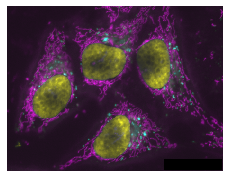

In [4]:
from microfilm.microplot import microshow
microshow(image_rolled);

By default it uses a Cyan, Magenta, Yellow combination of colormaps, but those can also be changed:

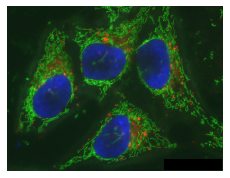

In [5]:
microshow(image_rolled, cmaps=['pure_red', 'pure_green', 'pure_blue']);

We can also visualize these three channels independently by splitting them. Furthermore, we can arrange multiple images side-by-side using [matplotlib subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html):

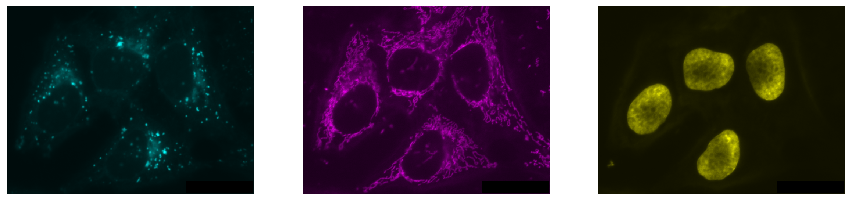

In [6]:
channel1 = image[:,:,0]
channel2 = image[:,:,1]
channel3 = image[:,:,2]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,15))

microshow(channel1, ax=axs[0], cmaps='pure_cyan')
microshow(channel2, ax=axs[1], cmaps='pure_magenta')
microshow(channel3, ax=axs[2], cmaps='pure_yellow');

## Exercise
Explore look-up tables, a.k.a. [colormaps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and visualize the three channels above as similar as possible to how the image is visualized in ImageJ.